# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Elom Gbogbo

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [16]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.7.14
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.3
confection                0.1.5
contourpy                 1.3.3
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing     

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [17]:
def fetch_and_pickle(url: str, output_file: str):
    """
    Fetches the raw HTML from the given URL and pickles it to output_file.
    """
    response = requests.get(url)
    response.raise_for_status()
    html = response.text

    # Optionally, you can skim out just the article section (e.g. <article>…</article>)
    # For now, we pickle the full HTML string.
    with open(output_file, 'wb') as f:
        pickle.dump(html, f)

    print(f"Raw HTML fetched ({len(html)} bytes) and saved to {output_file}.")

if __name__ == '__main__':
    archive_url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
    output_path = "laser_headlights_article.pkl"
    fetch_and_pickle(archive_url, output_path)

Raw HTML fetched (335682 bytes) and saved to laser_headlights_article.pkl.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [18]:
def load_and_print_article_text(pkl_file: str):
    # Load the pickled HTML string
    with open(pkl_file, 'rb') as f:
        html = pickle.load(f)

    # Parse with BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')

    # Extract and print text from the article tag
    article = soup.find('article')
    if article:
        print(article.get_text(strip=True, separator='\n'))
    else:
        print("No <article> tag found.")

if __name__ == '__main__':
    load_and_print_article_text("laser_headlights_article.pkl")


How Laser Headlights Work
130 Comments
by:
Lewin Day
March 22, 2021
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance aw

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [19]:
def load_article_text(pkl_file: str) -> str:
    with open(pkl_file, 'rb') as f:
        html = pickle.load(f)
    soup = BeautifulSoup(html, 'html.parser')
    article = soup.find('article')
    return article.get_text(separator=' ', strip=True) if article else ""

def get_most_common_tokens(text: str, n: int = 5):
    nlp = spacy.load("en_core_web_sm")  # Load small English pipeline
    doc = nlp(text)

    # Filter tokens: no stopwords, no punctuation, no spaces
    tokens = [
        token.text.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    freq = Counter(tokens).most_common(n)
    return freq

if __name__ == '__main__':
    article_path = "laser_headlights_article.pkl"  
    text = load_article_text(article_path)
    
    if text:
        top_tokens = get_most_common_tokens(text)

        print("Top 5 Most Frequent Tokens:")
        for token, count in top_tokens:
            print(f"Token: '{token}' - Frequency: {count}")
    else:
        print("Article text could not be loaded.")

Top 5 Most Frequent Tokens:
Token: 'laser' - Frequency: 35
Token: 'headlights' - Frequency: 19
Token: 'headlight' - Frequency: 11
Token: 'technology' - Frequency: 10
Token: 'led' - Frequency: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [20]:
def load_article_text(pkl_file: str) -> str:
    with open(pkl_file, 'rb') as f:
        html = pickle.load(f)
    soup = BeautifulSoup(html, 'html.parser')
    article = soup.find('article')
    return article.get_text(separator=' ', strip=True) if article else ""

def get_most_common_lemmas(text: str, n: int = 5):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)

    # Filter: no stopwords, punctuation, or space
    lemmas = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    freq = Counter(lemmas).most_common(n)
    return freq

if __name__ == '__main__':
    article_path = "laser_headlights_article.pkl"  # Change if using full HTML
    text = load_article_text(article_path)

    if text:
        top_lemmas = get_most_common_lemmas(text)

        print("Top 5 Most Frequent Lemmas:")
        for lemma, count in top_lemmas:
            print(f"Lemma: '{lemma}' - Frequency: {count}")
    else:
        print("Article text could not be loaded.")

Top 5 Most Frequent Lemmas:
Lemma: 'laser' - Frequency: 40
Lemma: 'headlight' - Frequency: 28
Lemma: 'beam' - Frequency: 12
Lemma: 'technology' - Frequency: 10
Lemma: 'led' - Frequency: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [21]:
# Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")

def load_article_text(pkl_file: str) -> str:
    with open(pkl_file, 'rb') as f:
        html = pickle.load(f)
    soup = BeautifulSoup(html, 'html.parser')
    article = soup.find('article')
    return article.get_text(separator=' ', strip=True) if article else ""

def get_most_common_tokens(text: str, n: int = 5):
    doc = nlp(text)
    tokens = [
        token.text.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]
    return [token for token, _ in Counter(tokens).most_common(n)]

def get_most_common_lemmas(text: str, n: int = 5):
    doc = nlp(text)
    lemmas = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]
    return [lemma for lemma, _ in Counter(lemmas).most_common(n)]

# --- Sentence Scoring Functions ---
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    token_count = sum(1 for token in doc if not token.is_punct and not token.is_space)
    interesting_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    return interesting_count / token_count if token_count else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    token_count = sum(1 for token in doc if not token.is_punct and not token.is_space)
    interesting_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    return interesting_count / token_count if token_count else 0

# --- Test Example ---
if __name__ == '__main__':
    article_path = "laser_headlights_article.pkl"
    text = load_article_text(article_path)

    if text:
        # Get first sentence
        doc = nlp(text)
        first_sentence = list(doc.sents)[0].text
        print("First sentence:")
        print(first_sentence)
        print()

        # Get top tokens and lemmas
        top_tokens = get_most_common_tokens(text)
        top_lemmas = get_most_common_lemmas(text)

        print(f"Top Tokens: {top_tokens}")
        print(f"Top Lemmas: {top_lemmas}")
        print()

        # Score first sentence
        token_score = score_sentence_by_token(first_sentence, top_tokens)
        lemma_score = score_sentence_by_lemma(first_sentence, top_lemmas)

        print(f"Token Score: {token_score:.3f}")
        print(f"Lemma Score: {lemma_score:.3f}")
    else:
        print("Failed to load article text.")

First sentence:
How Laser Headlights Work 130 Comments by: Lewin Day March 22, 2021 When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.

Top Tokens: ['laser', 'headlights', 'headlight', 'technology', 'led']
Top Lemmas: ['laser', 'headlight', 'beam', 'technology', 'led']

Token Score: 0.121
Lemma Score: 0.091


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

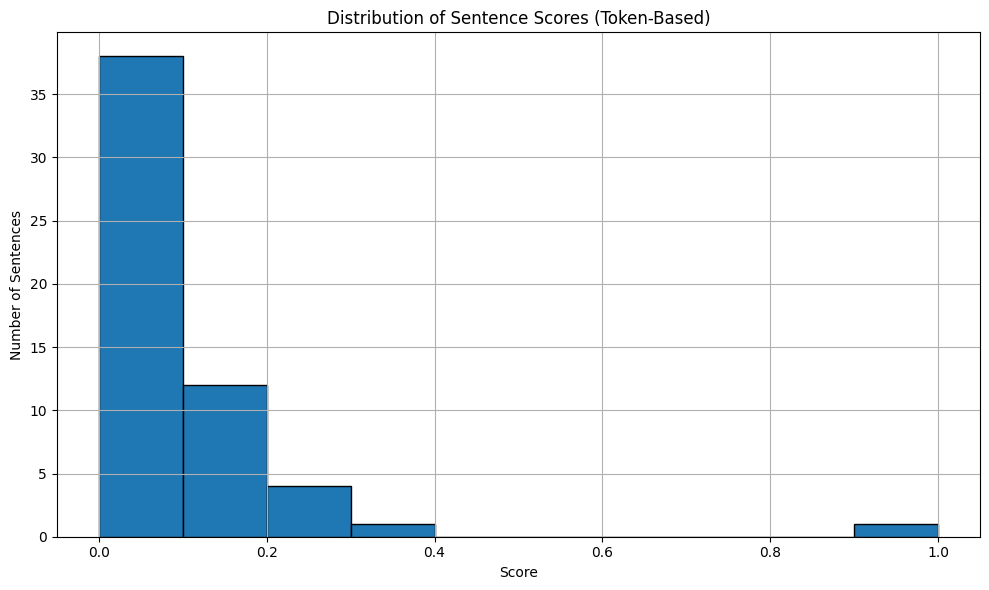

Total sentences scored: 56


In [22]:
# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Helper function to load article text
def load_article_text(pkl_file: str) -> str:
    with open(pkl_file, 'rb') as f:
        html = pickle.load(f)
    soup = BeautifulSoup(html, 'html.parser')
    article = soup.find('article')
    return article.get_text(separator=' ', strip=True) if article else ""

# Get most common tokens from article text
def get_most_common_tokens(text: str, n: int = 5):
    doc = nlp(text)
    tokens = [
        token.text.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]
    return [token for token, _ in Counter(tokens).most_common(n)]

# Score a sentence by frequency of interesting tokens
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    token_count = sum(1 for token in doc if not token.is_punct and not token.is_space)
    interesting_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    return interesting_count / token_count if token_count else 0

# Main block
if __name__ == '__main__':
    article_path = "laser_headlights_article.pkl"
    text = load_article_text(article_path)

    if text:
        # Get top 5 most frequent tokens
        top_tokens = get_most_common_tokens(text)

        # Score each sentence in the article
        doc = nlp(text)
        sentence_scores = [
            score_sentence_by_token(sent.text, top_tokens) for sent in doc.sents
        ]

        # Plot histogram
        plt.figure(figsize=(10, 6))
        plt.hist(sentence_scores, bins=10, edgecolor='black')
        plt.title("Distribution of Sentence Scores (Token-Based)")
        plt.xlabel("Score")
        plt.ylabel("Number of Sentences")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print(f"Total sentences scored: {len(sentence_scores)}")
    else:
        print("Failed to load article text.")

# Most common score range appears to be between 0.0 and 0.1

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

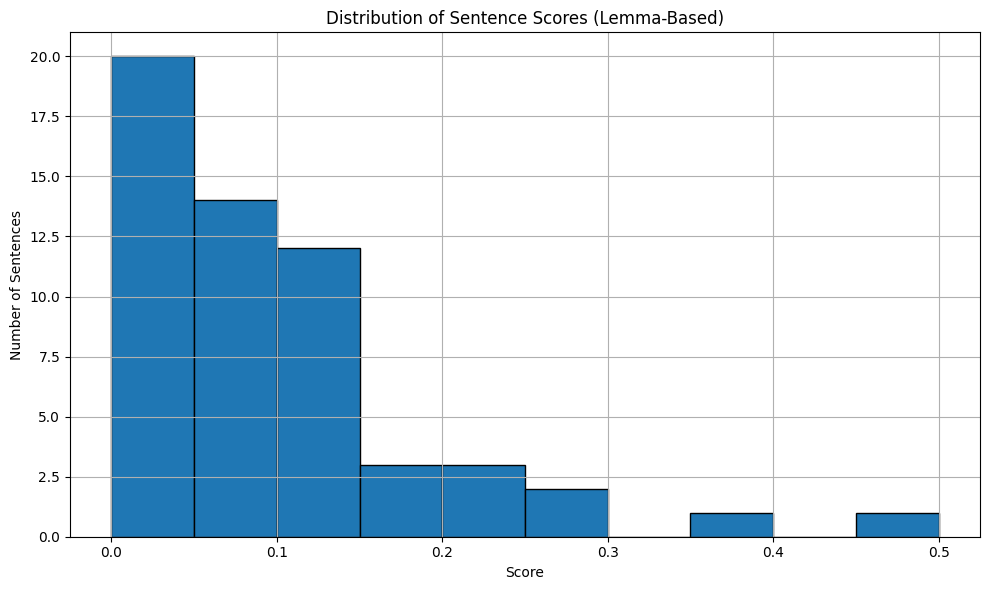

Total sentences scored: 56


In [23]:
# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Helper function to load article text
def load_article_text(pkl_file: str) -> str:
    with open(pkl_file, 'rb') as f:
        html = pickle.load(f)
    soup = BeautifulSoup(html, 'html.parser')
    article = soup.find('article')
    return article.get_text(separator=' ', strip=True) if article else ""

# Get most common lemmas from article text
def get_most_common_lemmas(text: str, n: int = 5):
    doc = nlp(text)
    lemmas = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]
    return [lemma for lemma, _ in Counter(lemmas).most_common(n)]

# Score a sentence by frequency of interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    token_count = sum(1 for token in doc if not token.is_punct and not token.is_space)
    interesting_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    return interesting_count / token_count if token_count else 0

# Main block
if __name__ == '__main__':
    article_path = "laser_headlights_article.pkl"
    text = load_article_text(article_path)

    if text:
        # Get top 5 most frequent lemmas
        top_lemmas = get_most_common_lemmas(text)

        # Score each sentence in the article by lemmas
        doc = nlp(text)
        sentence_scores = [
            score_sentence_by_lemma(sent.text, top_lemmas) for sent in doc.sents
        ]

        # Plot histogram
        plt.figure(figsize=(10, 6))
        plt.hist(sentence_scores, bins=10, edgecolor='black')
        plt.title("Distribution of Sentence Scores (Lemma-Based)")
        plt.xlabel("Score")
        plt.ylabel("Number of Sentences")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print(f"Total sentences scored: {len(sentence_scores)}")
    else:
        print("Failed to load article text.")

# Most common score range appears to be between 0.0 and 0.1

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Verbs, adjectives, adverbs, or any non-noun tokens or lemmas would need to be excluded. The updated code would be something like this:

tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ == "NOUN"
]

and it would look similar for lemmas as well. 